## Batch Normalization in Neural Networks

- Read how Batch Normalization works [click here](https://www.pinecone.io/learn/batch-layer-normalization/)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('../datasets/concertriccir2.csv', names=['X', 'Y', 'class'])

In [27]:
df.head()

,X,Y,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


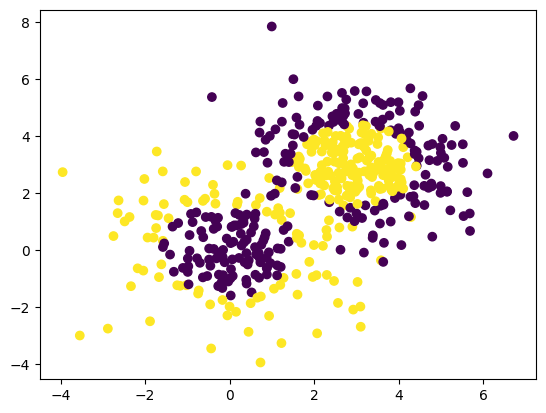

In [28]:
plt.scatter(df['X'], df['Y'], c=df['class'])

In [29]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

In [30]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

### NN Without BatchNorm

In [31]:
model = Sequential()

model.add(Dense(2, activation='relu', input_dim=2))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [33]:
history1 = model.fit(X, y, epochs=200, validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 1s 11ms/step - loss: 1.1134 - accuracy: 0.5300 - val_loss: 1.7401 - val_accuracy: 0.4300
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 1.0599 - accuracy: 0.5450 - val_loss: 1.6219 - val_accuracy: 0.4300
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 1.0095 - accuracy: 0.5500 - val_loss: 1.5208 - val_accuracy: 0.4300
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 0.9660 - accuracy: 0.5575 - val_loss: 1.4280 - val_accuracy: 0.4300
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 0.9286 - accuracy: 0.5625 - val_loss: 1.3433 - val_accuracy: 0.4300
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 0.8934 - accuracy: 0.5850 - val_loss: 1.2681 - val_accuracy: 0.4300
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 0.8628 - accuracy: 0.5950 - val_loss: 1.1996 - val_accuracy: 0.4300
Epoch 8/200


#### NN with BatchNorm

In [34]:
model = Sequential()

model.add(Dense(3, activation='relu', input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 9         
                                                                 
 batch_normalization_2 (Batc  (None, 3)                12        
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 2)                 8         
                                                                 
 batch_normalization_3 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 40
Trainable params: 30
Non-trainable pa

In [35]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [36]:
history2 = model.fit(X, y, epochs=200, validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 1s 15ms/step - loss: 0.7922 - accuracy: 0.5875 - val_loss: 0.6843 - val_accuracy: 0.5600
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 0.7884 - accuracy: 0.5900 - val_loss: 0.6858 - val_accuracy: 0.5400
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 0.7726 - accuracy: 0.5725 - val_loss: 0.6892 - val_accuracy: 0.4600
Epoch 4/200
13/13 [==============================] - 0s 4ms/step - loss: 0.7577 - accuracy: 0.5900 - val_loss: 0.6925 - val_accuracy: 0.5100
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 0.7448 - accuracy: 0.5875 - val_loss: 0.6960 - val_accuracy: 0.5400
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 0.7305 - accuracy: 0.5725 - val_loss: 0.6980 - val_accuracy: 0.5700
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 0.7215 - accuracy: 0.5850 - val_loss: 0.7003 - val_accuracy: 0.5100
Epoch 8/200


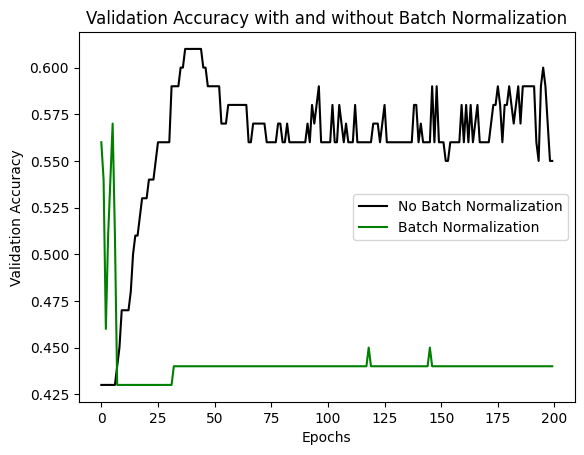

In [38]:
plt.plot(history1.history['val_accuracy'], color='black', label='No Batch Normalization')
plt.plot(history2.history['val_accuracy'], color='green',label='Batch Normalization')
plt.title('Validation Accuracy with and without Batch Normalization')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()